In [1]:
!pip install tensorflow==2.16.1

  Using cached tensorflow-2.16.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (589.8 MB)
  Using cached h5py-3.11.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (5.3 MB)
  Using cached libclang-18.1.1-py2.py3-none-manylinux2010_x86_64.whl (24.5 MB)
  Using cached keras-3.3.3-py3-none-any.whl (1.1 MB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl (26 kB)
  Using cached numpy-1.26.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.2 MB)
  Using cached tensorflow_io_gcs_filesystem-0.37.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (5.1 MB)
  Using cached tensorboard-2.16.2-py3-none-any.whl (5.5 MB)
  Using cached ml_dtypes-0.3.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (2.2 MB)
  Using cached optree-0.11.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (311 kB)
  Using cached namex-0.0.8-py3-none-any.whl (5.8 kB)
  Using cached rich-13.7.1-py3-none-any.whl (240 kB)
  Using cached grpcio-1.64.1

In [2]:
import tensorflow as tf
tf.__version__

2024-06-10 11:20:50.473512: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-10 11:20:50.479584: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-10 11:20:52.170145: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


'2.16.1'

In [3]:
import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from tensorflow.keras import layers
import time
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np


from IPython import display

In [11]:
def generate_and_save_images(model_path, num_images, save_path=None):
    
    if not os.path.exists(save_path):
        os.makedirs(save_path)
    
    # Wczytywanie zapisanego modelu
    model = tf.keras.models.load_model(model_path)
    
    # Generowanie losowych wektorów latentnych
    noise = tf.random.normal([num_images, 100])
    
    
    # Generowanie obrazów
    generated_images = model(noise, training=False)
    
    # Normalizacja obrazów z [-1, 1] do [0, 1]
    generated_images = (generated_images + 1) / 2.0
    
    # Tworzenie wykresu dla wygenerowanych obrazów
    fig, axs = plt.subplots(1, num_images, figsize=(num_images * 2, 2))
    for i in range(num_images):
        axs[i].imshow(generated_images[i, :, :, 0], cmap='gray')
        axs[i].axis('off')
        
        if save_path:
            img = Image.fromarray((generated_images[i, :, :, 0] * 255).numpy().astype(np.uint8))
            img.save(f"{save_path}/{i}.png")
    
    plt.show()

In [12]:
#generate_and_save_images('./GAN_Models/Models/20/generator_model_epoch_20000.h5', num_images=10, save_path="./Generated_images")

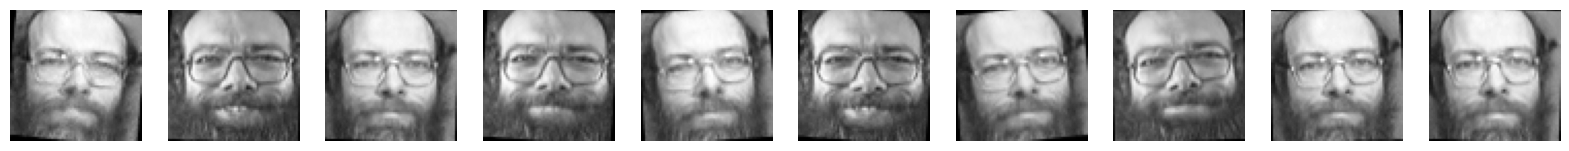

In [13]:
for i in range(20,21):
    generate_and_save_images(f'./GAN_Models/Models/{i}/generator_model_epoch_20000.h5', num_images=10, save_path=f"./Generated_images/{i}/")